# **Project Name** -
## Strava Fitness Project

 * Project Description-

 This project focuses on analyzing real-world health and activity data collected from Fitbit devices using SQL, Python, and data visualization tools. The objective is to gain actionable insights into user behavior related to daily activity, sleep patterns, calorie expenditure, and weight trends.

Using structured data from multiple CSV files—such as dailyActivity, sleepDay, weightLogInfo, and more—the project performs data cleaning, transformation, and exploratory analysis. SQL queries were used to join datasets, aggregate daily and minute-level metrics, and extract meaningful patterns. Python, along with libraries like pandas, seaborn, and matplotlib, was used to visualize key relationships such as:

Total steps vs. calories burned

Sleep duration distribution

BMI patterns

Active minutes vs. total calories etc,.

This project can be extended into a BI dashboard (using Power BI or Tableau) to create a user-centric health monitoring system. The visual insights help identify trends in physical activity, sleep quality, and their correlation with calories burned and body metrics.




## Import Libreries ##

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import FIles 

In [2]:
daily_activity= pd.read_csv("C:\\Users\\prave\\3D Objects\\dailyActivity_merged.csv")
daily_calories= pd.read_csv("C:\\Users\\prave\\3D Objects\\dailyCalories_merged.csv")
daily_intensities = pd. read_csv("C:\\Users\\prave\\3D Objects\\dailyIntensities_merged.csv")
daily_steps= pd.read_csv("C:\\Users\\prave\\3D Objects\\dailySteps_merged.csv")
heartrate_secounds= pd.read_csv("C:\\Users\\prave\\3D Objects\\heartrate_seconds_merged.csv")
hourly_calories= pd.read_csv("C:\\Users\\prave\\3D Objects\\hourlyCalories_merged.csv")
hourly_intensities= pd.read_csv("C:\\Users\\prave\\3D Objects\\hourlyIntensities_merged.csv")
hourly_steps= pd.read_csv("C:\\Users\\prave\\3D Objects\\hourlySteps_merged.csv")
minute_Calories_narrow = pd.read_csv("C:\\Users\\prave\\3D Objects\\minuteCaloriesnarrow_merged.csv")
minute_Calories_wide= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteCaloriesWide_merged.csv")
minute_Intensities_narrow= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteIntensitiesNarrow_merged.csv")
minute_Intensities_wide= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteIntensitiesWide_merged.csv")
minute_METs= pd.read_csv("C:\\Users\\prave\\3D Objects\\minuteMETsNarrow_merged.csv")
minute_Sleep= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteSleep_merged.csv")
minute_StepsNarrow= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteStepsNarrow_merged.csv")
minute_Stepwide= pd. read_csv("C:\\Users\\prave\\3D Objects\\minuteStepsWide_merged.csv")
sleep_day= pd.read_csv("C:\\Users\\prave\\3D Objects\\sleepDay_merged.csv")
weight_log= pd.read_csv("C:\\Users\\prave\\3D Objects\\weightLogInfo_merged.csv")


In [3]:
sns.set(style="whitegrid")

***Chart 1: Average Daily Steps Distribution***

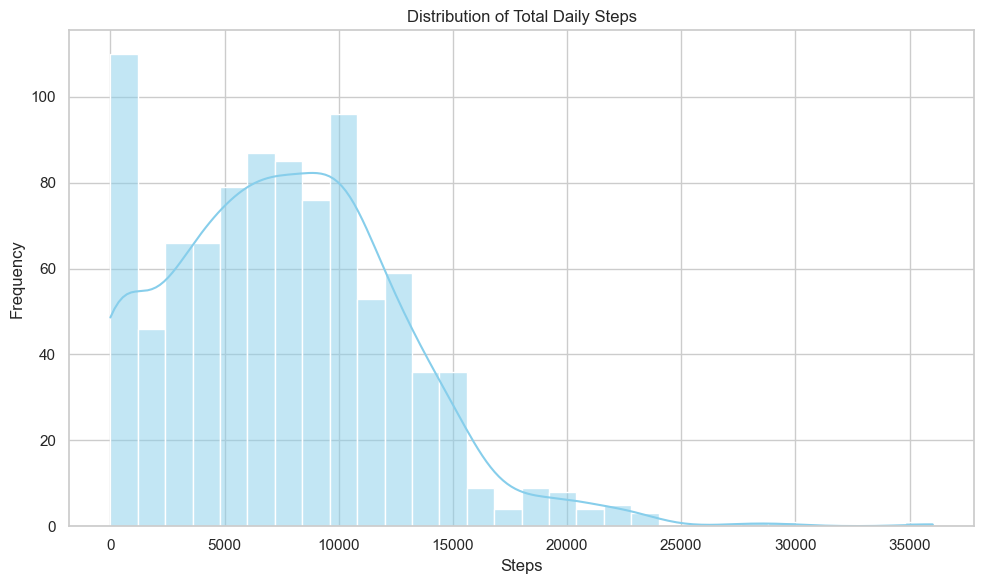

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_activity['Total Steps'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Daily Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


***Chart 2. Calories vs Total***

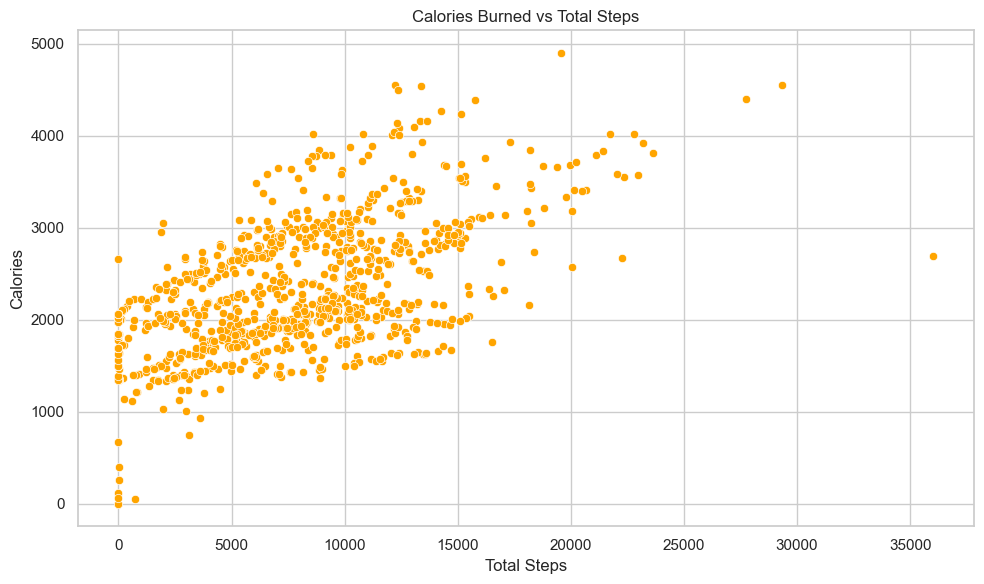

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Steps', y='Calories', data=daily_activity, color='orange')
plt.title('Calories Burned vs Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()

***Chart 3. Sleep Duration Distribution***


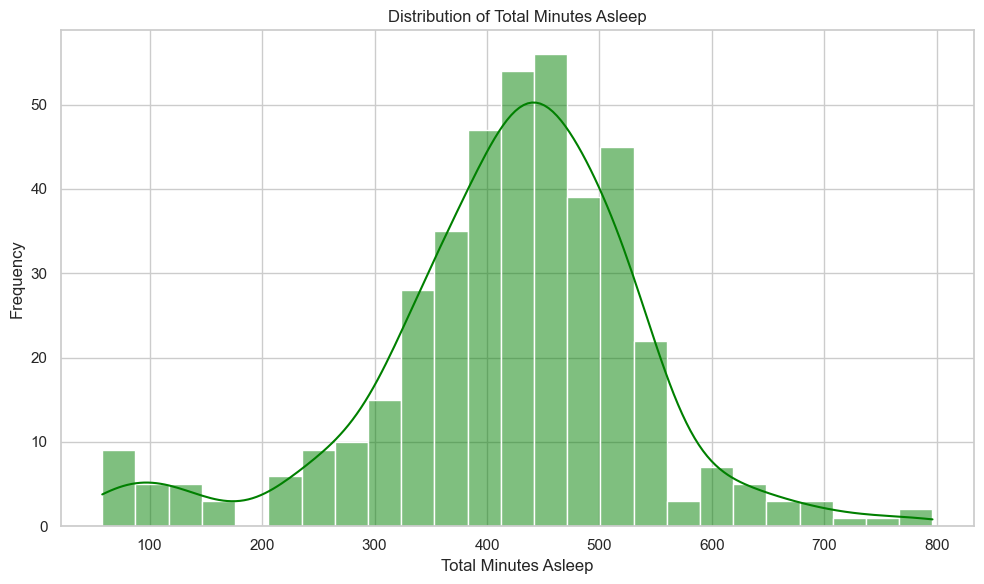

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sleep_day['TotalMinutesAsleep'], bins=25, color='green', kde=True)
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***Chart 4.  BMI Distribution from Weight Log*** 

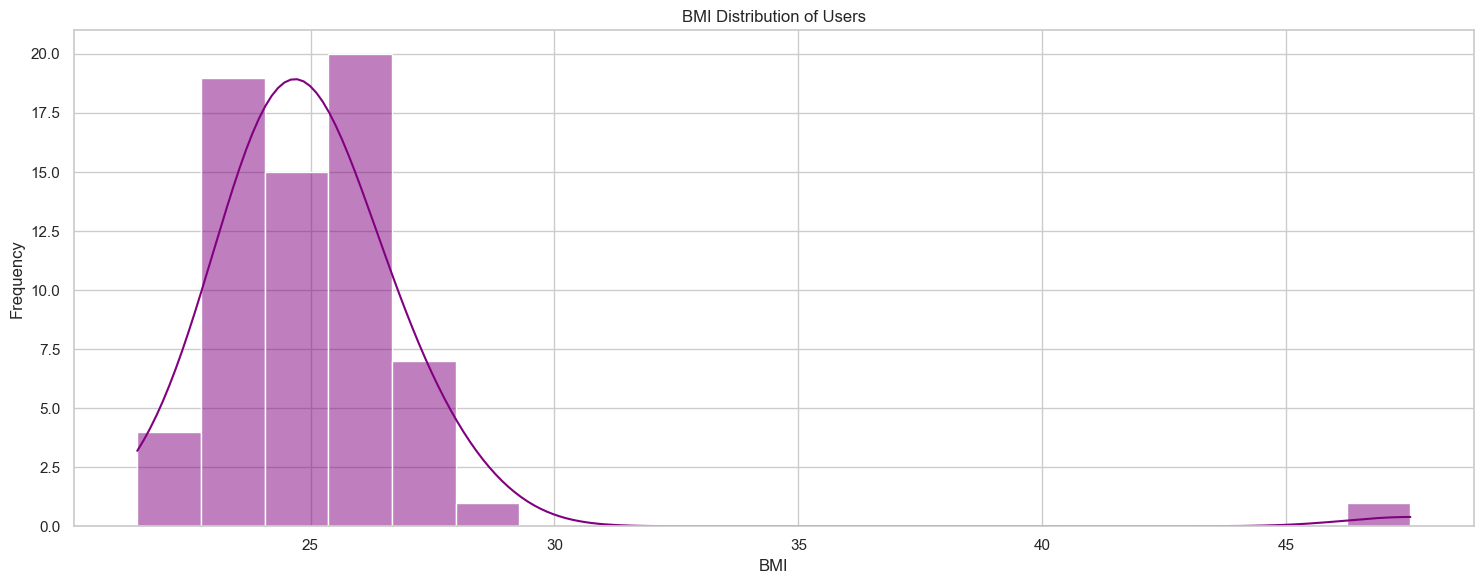

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(weight_log['BMI'].dropna(), bins=20, kde=True, color='purple')
plt.title('BMI Distribution of Users')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***Chart 5. Very Active minute vs Calories***

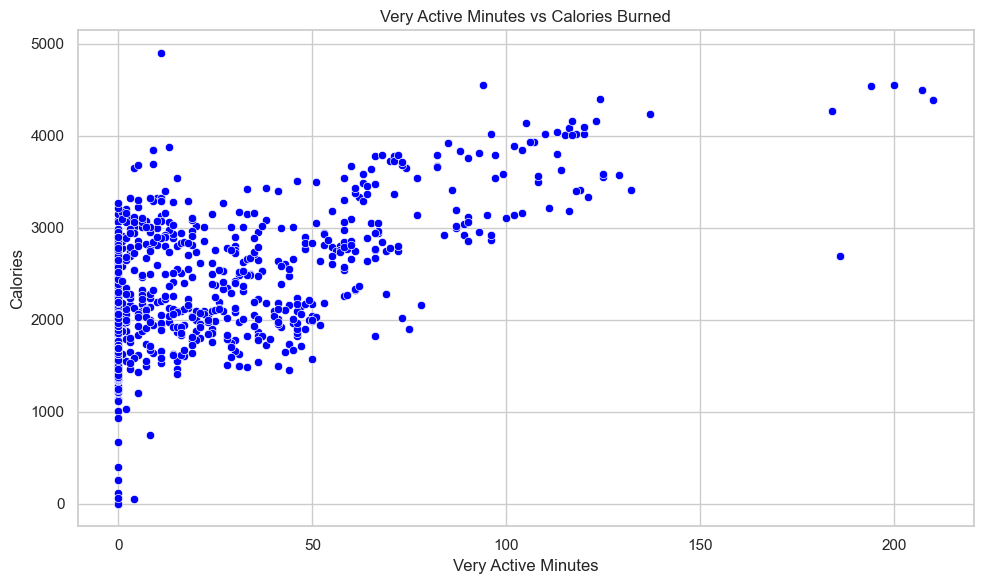

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity, x='Very Active Minutes', y='Calories', color='blue')
plt.title('Very Active Minutes vs Calories Burned')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()

***Chart 6.Total Time in Bed vs Total Minutes Asleep***


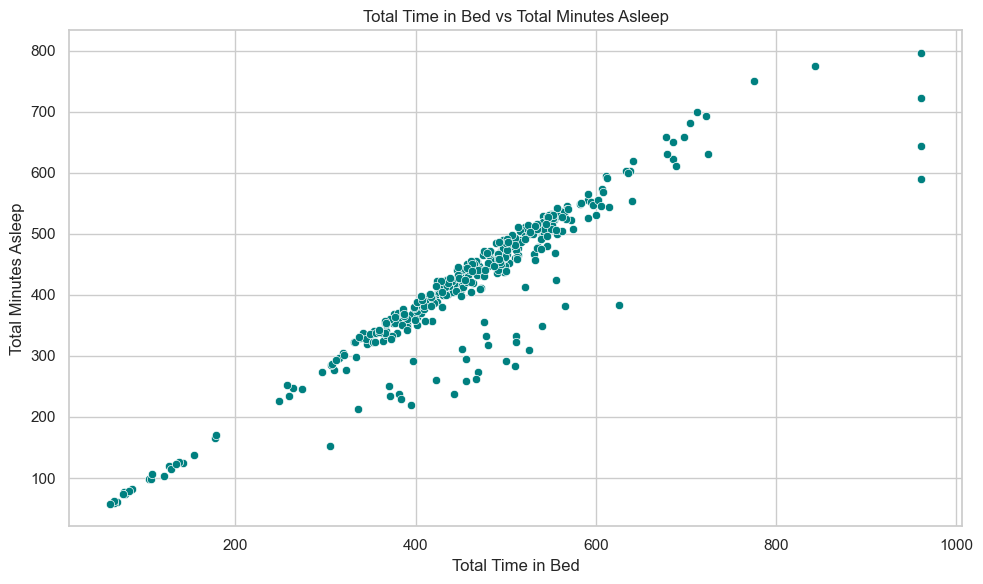

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sleep_day, x='TotalTimeInBed', y='TotalMinutesAsleep', color='teal')
plt.title('Total Time in Bed vs Total Minutes Asleep')
plt.xlabel('Total Time in Bed')
plt.ylabel('Total Minutes Asleep')
plt.tight_layout()
plt.show()

***Chart 7. Daily step Distribution*** 

In [ ]:
#Convert date column 
daily_steps["ActivityDay"] = pd.to_datetime(daily_steps["ActivityDay"])
daily_intensities["ActivityDay"] = pd.to_datetime(daily_intensities["ActivityDay"])
heartrate_secounds["Time"] = pd.to_datetime(heartrate_secounds["Time"])


In [ ]:
#Merge  daily step and intensities
daily = pd.merge(daily_steps, daily_intensities, on=["Id", "ActivityDay"])


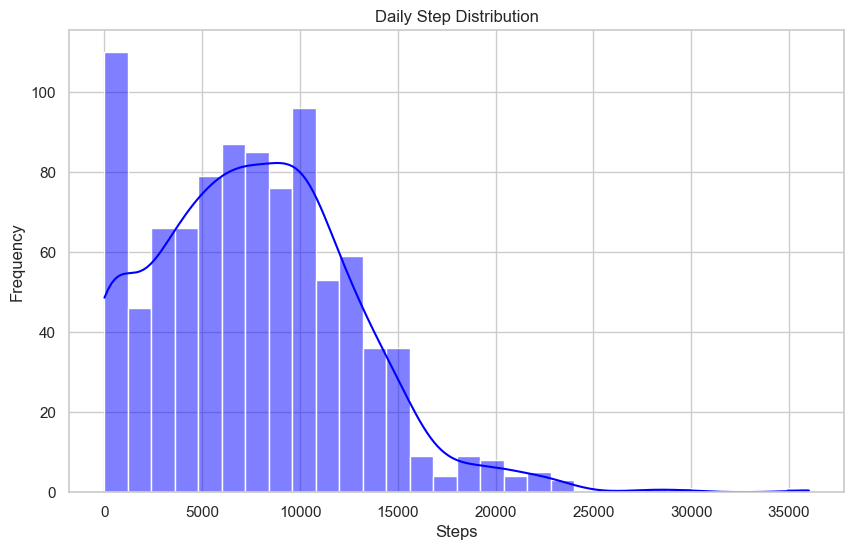

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=daily, x="StepTotal", bins=30, kde=True, color="blue")
plt.title("Daily Step Distribution")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


***Chart 8.  Calories Burned vs Steps Taken***


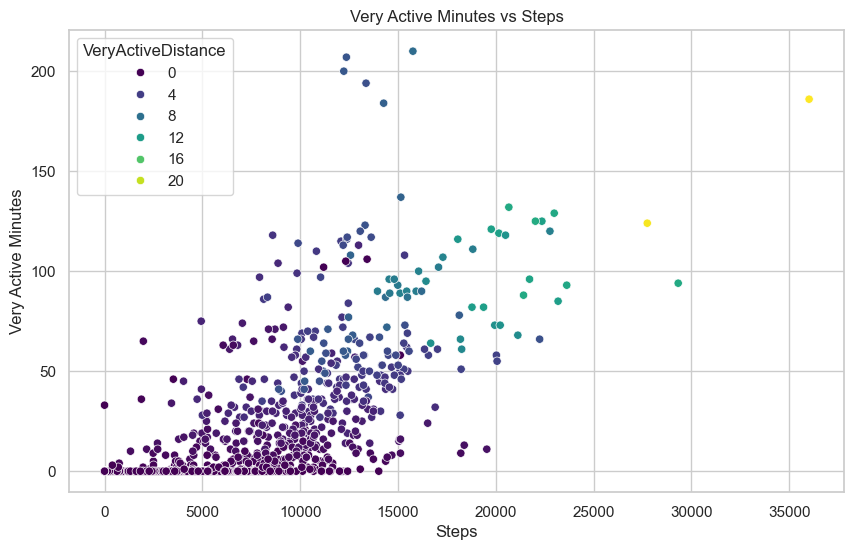

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily, x="StepTotal", y="VeryActiveMinutes", hue="VeryActiveDistance", palette="viridis")
plt.title("Very Active Minutes vs Steps")
plt.xlabel("Steps")
plt.ylabel("Very Active Minutes")
plt.grid(True)
plt.show()

***Chart 9 Intensities Minute Breakdown***

In [ ]:
daily_intensity_plot = daily[["ActivityDay", "SedentaryMinutes", "LightlyActiveMinutes",
                              "FairlyActiveMinutes", "VeryActiveMinutes"]].set_index("ActivityDay")


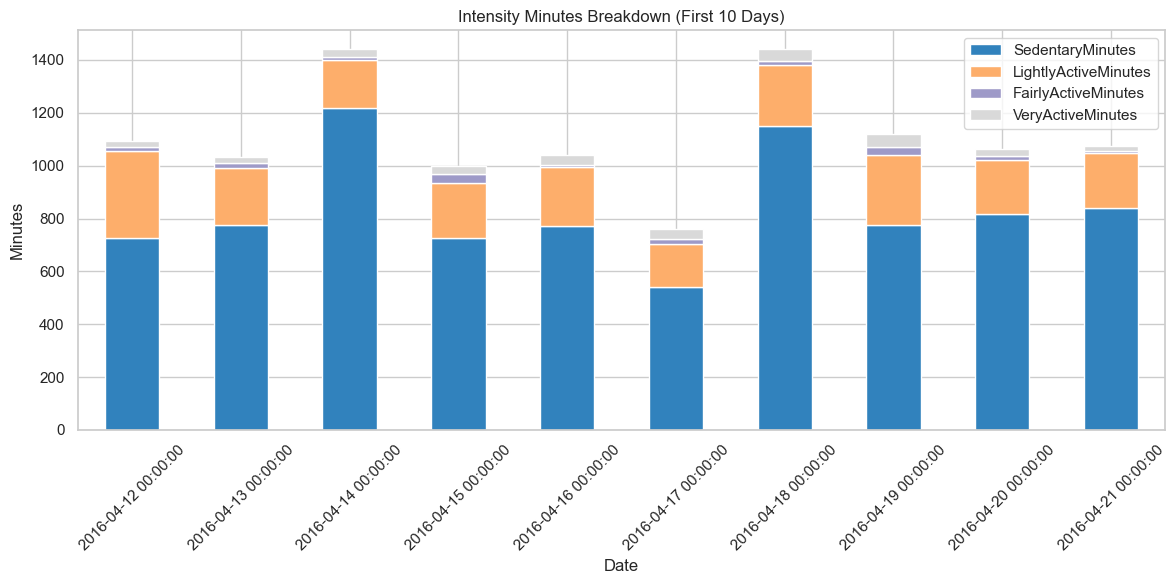

In [ ]:

daily_intensity_plot.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20c")
plt.title("Intensity Minutes Breakdown (First 10 Days)")
plt.ylabel("Minutes")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Chart 10 . Heartrate over Time***


In [ ]:
user_heart = heartrate_secounds[heartrate_secounds["Id"] == heartrate_secounds["Id"].unique()[0]]


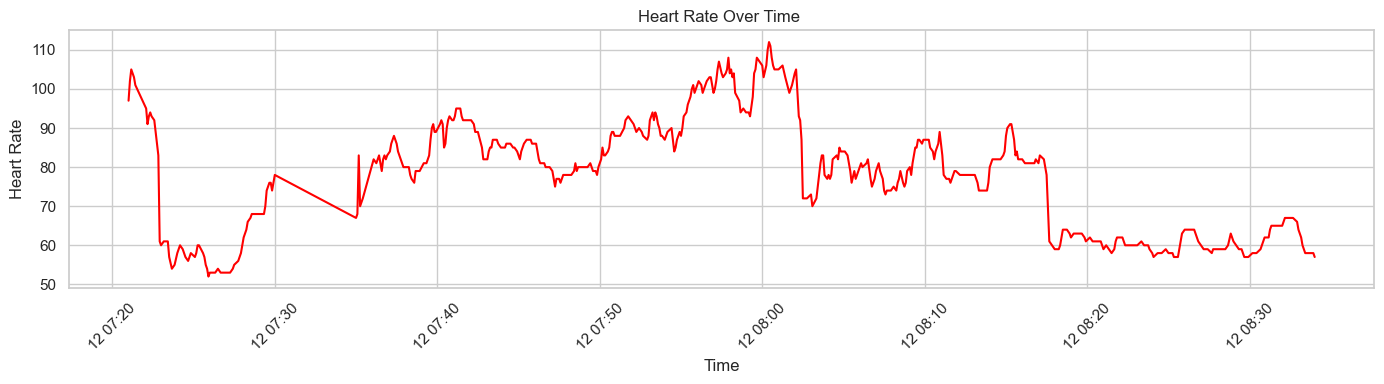

In [ ]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=user_heart.head(500), x="Time", y="Value", color="red")
plt.title("Heart Rate Over Time ")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Chart 11. Correltion Heatmap***

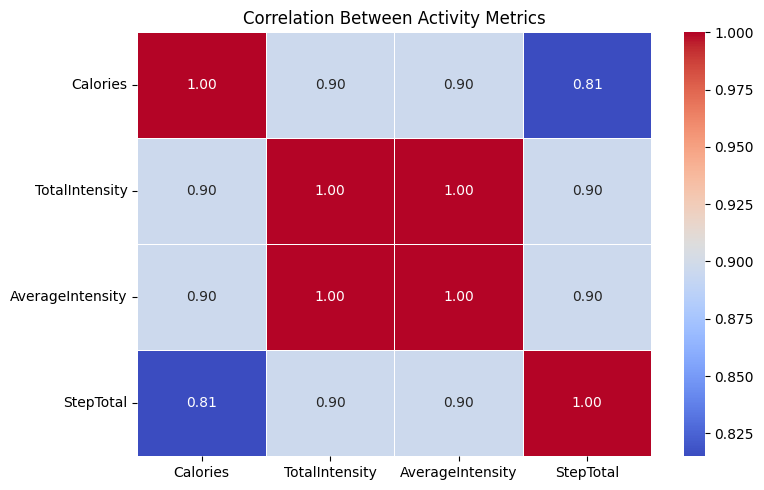

In [ ]:
# Merge datasets on Id and ActivityHour
hourly_data = pd.merge(hourly_calories, hourly_intensities, on=["Id", "ActivityHour"])
hourly_data = pd.merge(hourly_data, hourly_steps, on=["Id", "ActivityHour"])

# Compute correlation matrix
correlation = hourly_data[["Calories", "TotalIntensity", "AverageIntensity", "StepTotal"]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Activity Metrics")
plt.tight_layout()
plt.show()

***Chart 12. Sleep Pattern***

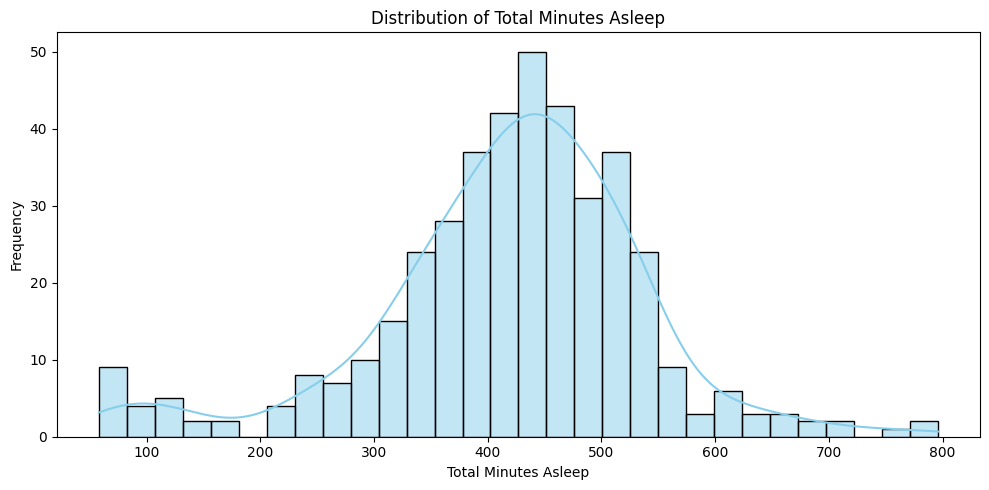

In [ ]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])


plt.figure(figsize=(10, 5))
sns.histplot(sleep_day['TotalMinutesAsleep'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***Chart 13.Weight vs BMI***

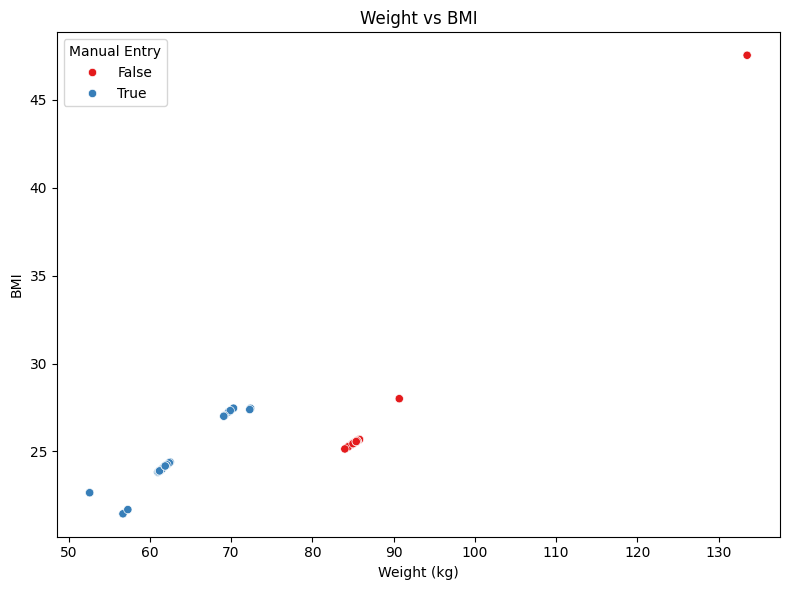

In [ ]:
weight_log['Date'] = pd.to_datetime(weight_log['Date'])


plt.figure(figsize=(8, 6))
sns.scatterplot(data=weight_log, x='WeightKg', y='BMI', hue='IsManualReport', palette='Set1')
plt.title('Weight vs BMI')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.legend(title='Manual Entry')
plt.tight_layout()
plt.show()

***Chart 14.Daily METs Trends***

In [5]:
minute_METs['ActivityMinute'] = pd.to_datetime(minute_METs['ActivityMinute'])



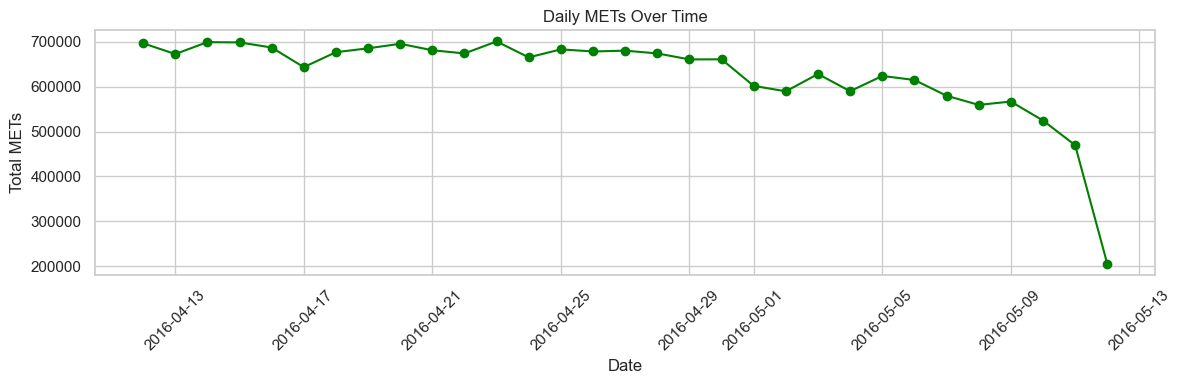

In [6]:
daily_met = minute_METs.groupby(minute_METs['ActivityMinute'].dt.date)['METs'].sum()

plt.figure(figsize=(12, 4))
daily_met.plot(marker='o', color='green')
plt.title('Daily METs Over Time')
plt.xlabel('Date')
plt.ylabel('Total METs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Chart 15. Hourly Steps***

In [8]:
minute_StepsNarrow['ActivityMinute'] = pd.to_datetime(minute_StepsNarrow['ActivityMinute'])


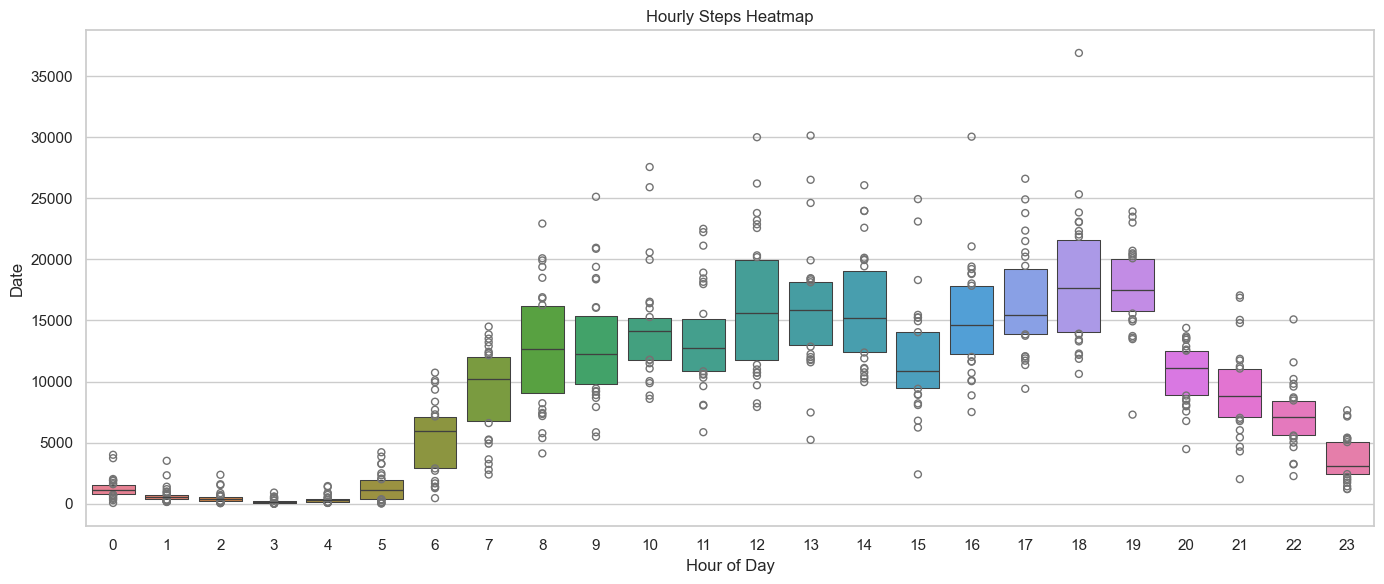

In [17]:
minute_StepsNarrow['Hour'] = minute_StepsNarrow['ActivityMinute'].dt.hour
minute_StepsNarrow['Date'] = minute_StepsNarrow['ActivityMinute'].dt.date
hourly_steps = minute_StepsNarrow.groupby(['Date', 'Hour'])['Steps'].sum().unstack()

plt.figure(figsize=(14, 6))
sns.boxenplot(hourly_steps, cmap='mako')
plt.title('Hourly Steps Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

***Chart 16.Correlation Heatmap sleep***

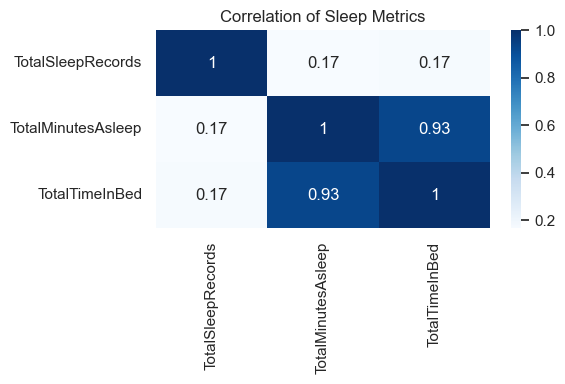

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(sleep_day[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].corr(), annot=True, cmap='Blues')
plt.title('Correlation of Sleep Metrics')
plt.tight_layout()
plt.show()